In [104]:
# Import required libraries and set table view
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_rows",10)
pd.set_option('display.max_columns', None)

In [99]:
# Load the csv file through Pandas
dataset = pd.read_csv("hotel_bookings.csv")

(119390, 32)

In [100]:
# Handle missing Values
dataset.children.fillna(0.0,inplace=True)
dataset.country.fillna("UNKNOWN",inplace=True)
dataset.agent.fillna(0.0,inplace=True)
dataset.company.fillna(0.0,inplace=True)


arrival_date_month
August       8638
July         7919
May          7114
October      6914
March        6645
             ... 
September    6392
February     5372
November     4672
December     4409
January      4122
Name: arrival_date_month, Length: 12, dtype: int64


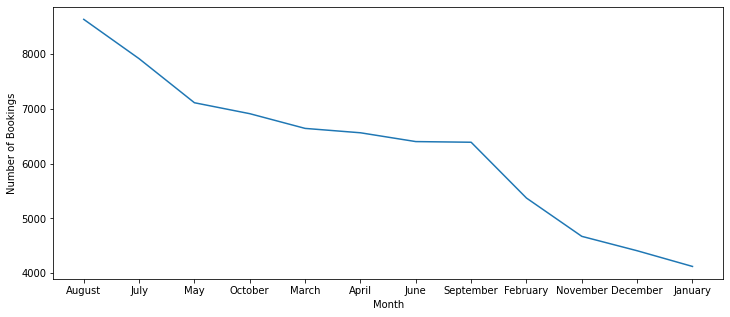

In [173]:
# Time of year vs booking comparison sorted in decreasing order considering only uncancelled bookings
not_cancelled_bookings = dataset.loc[dataset.is_canceled == 0]
month_freq = not_cancelled_bookings.groupby("arrival_date_month").arrival_date_month.count()
month_freq.sort_values(inplace=True,ascending = False)
print(month_freq)
plt.figure(figsize=(12,5))
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.plot(month_freq.index,month_freq.values)

### Inferences
Looking at the plot follwing can be inferred :
- Hotel bookings drop significantly in winters
- Bookings peak during summer vacations

arrival_date_month
August       142.088795
July         129.253758
June         114.589636
September    107.277159
May          104.842342
                ...    
December      78.920238
March         77.331574
February      72.419429
November      70.505169
January       67.001050
Name: adr, Length: 12, dtype: float64


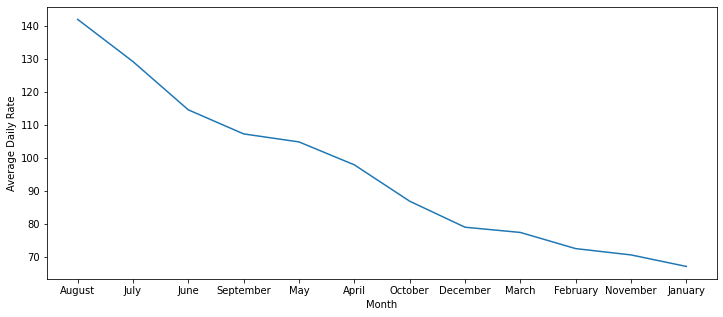

In [185]:
month_price = not_cancelled_bookings.groupby("arrival_date_month").adr.mean()
month_price.sort_values(inplace=True,ascending = False)
print(month_price)
plt.figure(figsize=(12,5))
plt.xlabel("Month")
plt.ylabel("Average Daily Rate")
plt.plot(month_price.index,month_price.values)

### Inferences
Looking at the plot following inferences can be drawn:
- Prices peak at about the same time the numbers of bookings increase
- This might have been done to maximise profit by the hotel owner 

                      len   min      max
assigned_room_type                      
A                   74053  0.00  5400.00
B                    2163  0.00   284.10
C                    2375  0.00   508.00
D                   25322  0.00   375.50
E                    7806  0.00   451.50
...                   ...   ...      ...
H                     712 -6.38   437.00
I                     363  0.00   310.20
K                     279  0.00   283.23
L                       1  8.00     8.00
P                      12  0.00     0.00

[12 rows x 3 columns]
assigned_room_type
A     93.142347
B     94.450264
C    113.423583
D    107.453633
E    117.704224
        ...    
H    171.380772
I     40.843774
K     53.698889
L      8.000000
P      0.000000
Name: adr, Length: 12, dtype: float64


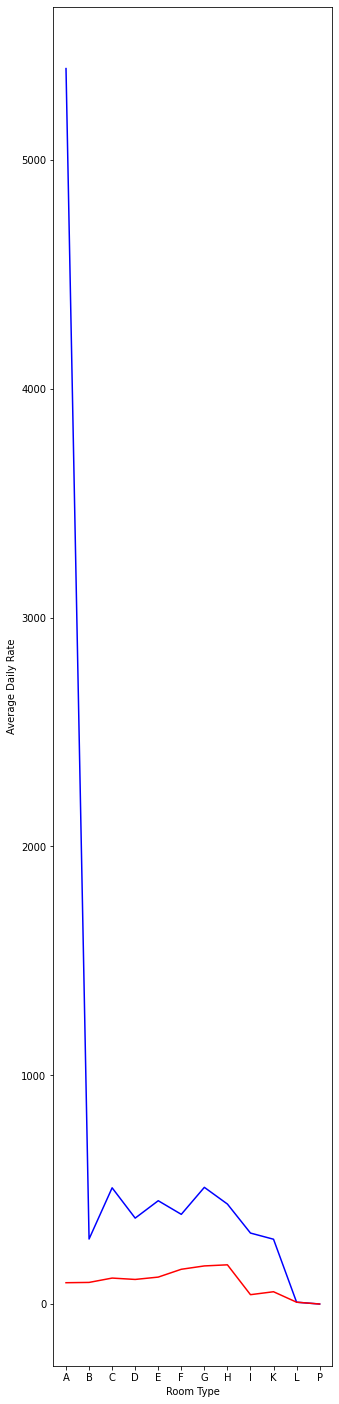

In [191]:
#Finding maximum priced room types
room_price_categorisation = dataset.groupby("assigned_room_type").adr.agg([len,min,max])
room_price_categorisation_mean = dataset.groupby("assigned_room_type").adr.mean()
# room_price_categorisation.sort_values(by='max',inplace=True,ascending = False)
# room_price_categorisation_mean.sort_values(inplace=True,ascending = False)
print(room_price_categorisation)
print(room_price_categorisation_mean)
plt.figure(figsize=(5,25))
plt.xlabel("Room Type")
plt.ylabel("Average Daily Rate")
plt.plot(room_price_categorisation.index,room_price_categorisation.iloc[:,2],'b',room_price_categorisation_mean.index,room_price_categorisation_mean.values,'r')

In [ ]:
###m

           len     min      max
country                        
BHS          1   50.85    50.85
NIC          1  139.00   139.00
DMA          1  105.30   105.30
NCL          1  175.50   175.50
NAM          1  121.61   121.61
...        ...     ...      ...
DEU       7287    0.00   307.00
ESP       8568    0.00   402.00
FRA      10415    0.00   378.00
GBR      12129   -6.38   382.00
PRT      48590    0.00  5400.00

[178 rows x 3 columns]


<BarContainer object of 178 artists>

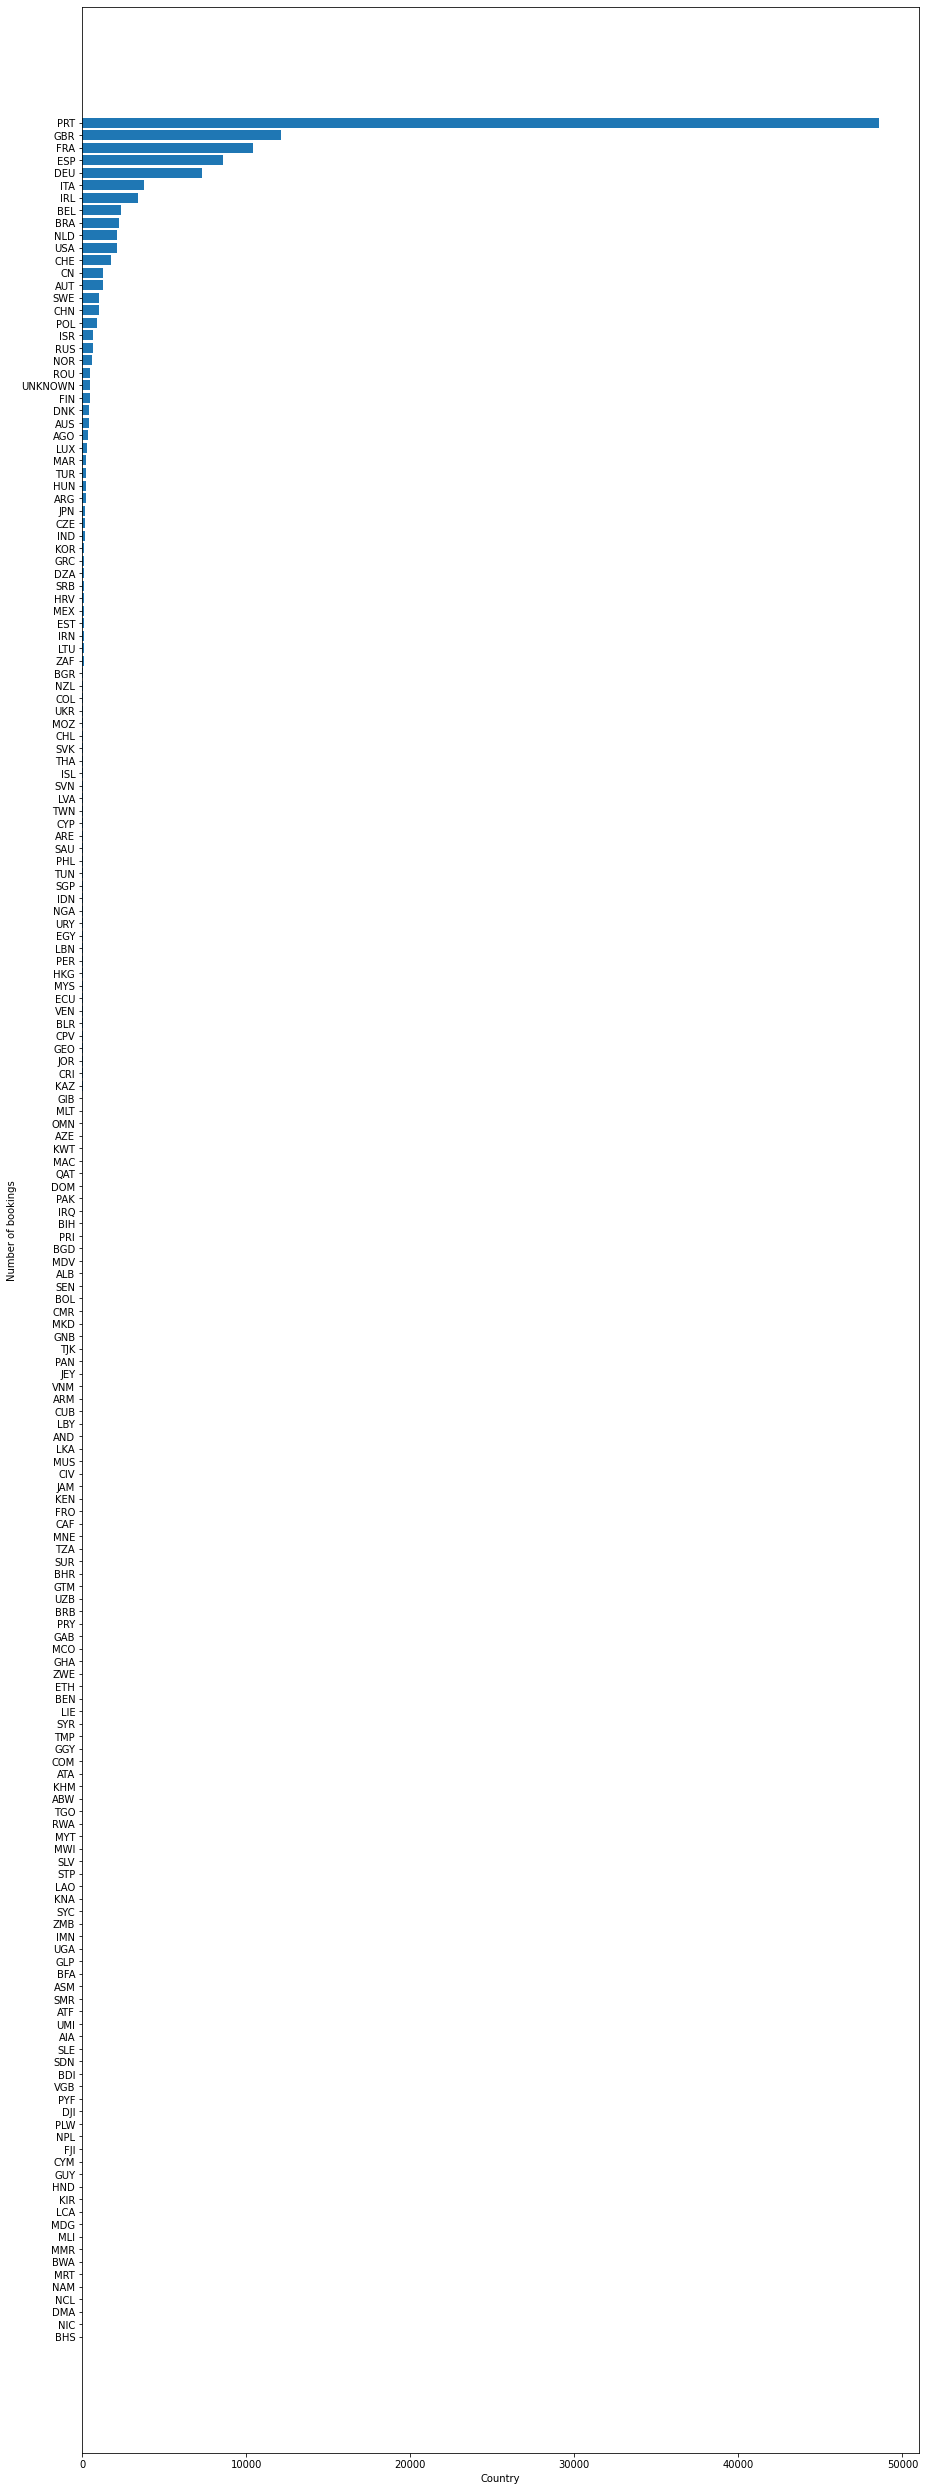

In [219]:
# Finding the maximum number of bookings per country
country_wise_bookings = dataset.groupby("country").adr.agg([len,min,max])
country_wise_bookings.sort_values(by='len',inplace=True,ascending = True)
print(country_wise_bookings)
plt.figure(figsize=(15,45))
plt.xlabel("Country")
plt.ylabel("Number of bookings")
# plt.plot(country_wise_bookings.iloc[:,0],country_wise_bookings.index)
plt.barh(country_wise_bookings.index,country_wise_bookings.iloc[:,0])

### Trend 1
- As expected, more waiting days result in increased cancellation of bookings

               len     sum      mean
is_canceled                         
0            75166  119504  1.589868
1            44224  157618  3.564083


<BarContainer object of 2 artists>

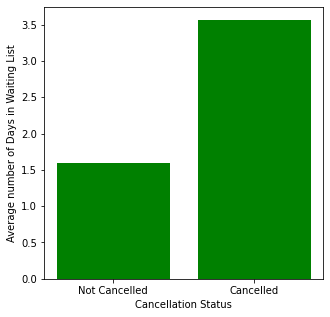

In [225]:
cancel_due_to_wait = dataset.groupby("is_canceled").days_in_waiting_list.agg([len,sum,np.mean])
print(cancel_due_to_wait)
plt.figure(figsize=(5,5))
plt.xlabel("Cancellation Status")
plt.ylabel("Average number of Days in Waiting List")
plt.bar(["Not Cancelled","Cancelled"],cancel_due_to_wait.iloc[:,2],color = 'green')


### Trend 2
- People tend to cancel more often when no security deposit has been given
- Less cancellations even when the desposit is refundable might be because hotels offering refundable deposit are less in number

                len
deposit_type       
No Deposit    29694
Non Refund    14494
Refundable       36


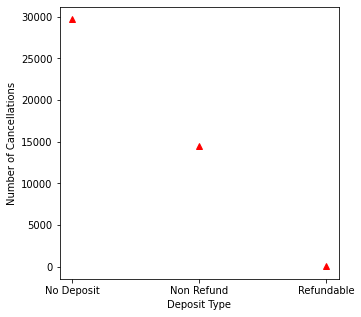

In [238]:
cancelled_bookings = dataset.loc[dataset.is_canceled == 1]
cancel_with_penalty = cancelled_bookings.groupby("deposit_type").is_canceled.agg([len])
print(cancel_with_penalty)
plt.figure(figsize=(5,5))
plt.xlabel("Deposit Type")
plt.ylabel("Number of Cancellations")
plt.plot(cancel_with_penalty.index,cancel_with_penalty.values,'r^')

### Trend 3

### Trend 4